In [1]:
import pandas as pd


df = pd.read_csv("mental_health.csv")

In [11]:
df.sample(5)

,User_ID,Age,Gender,Weight,Height,Medical_Conditions,Medication,Smoker,Alcohol_Consumption,Timestamp,...,ECG,Calories_Intake,Water_Intake,Stress_Level,Mood,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
4711,U_04712,50,Male,138.204119,154.747332,Hypertension,Yes,Yes,Moderate,16-07-2021 07:00,...,Abnormal,2473.028445,1.288298,Moderate,Sad,33.319023,15.943458,72.325377,60.980758,1
2321,U_02322,58,Other,134.371497,188.919346,Diabetes,No,No,Heavy,07-04-2021 17:00,...,Normal,2828.310092,2.078837,Low,Anxious,36.517709,10.690495,61.184635,66.572552,0
6170,U_06171,32,Female,31.230986,148.433906,NaN,Yes,Yes,Heavy,15-09-2021 02:00,...,Normal,2927.200116,1.062107,Low,Anxious,37.784315,13.060734,24.096589,16.218887,1
7091,U_07092,38,Female,92.811008,199.856667,NaN,Yes,No,Heavy,23-10-2021 11:00,...,Abnormal,2547.965454,0.884219,Low,Happy,35.926970,32.127150,30.336229,31.341304,1
8508,U_08509,79,Female,54.771169,176.128937,NaN,No,No,NaN,21-12-2021 12:00,...,Abnormal,2997.279924,2.933852,High,Anxious,34.776397,29.568382,43.236100,43.837595,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              10000 non-null  object 
 1   Age                  10000 non-null  int64  
 2   Gender               10000 non-null  object 
 3   Weight               10000 non-null  float64
 4   Height               10000 non-null  float64
 5   Medical_Conditions   6696 non-null   object 
 6   Medication           10000 non-null  object 
 7   Smoker               10000 non-null  object 
 8   Alcohol_Consumption  6640 non-null   object 
 9   Timestamp            10000 non-null  object 
 10  Day_of_Week          10000 non-null  object 
 11  Sleep_Duration       10000 non-null  float64
 12  Deep_Sleep_Duration  10000 non-null  float64
 13  REM_Sleep_Duration   10000 non-null  object 
 14  Wakeups              10000 non-null  int64  
 15  Snoring              10000 non-null  

In [13]:
df.describe()

,Age,Weight,Height,Sleep_Duration,Deep_Sleep_Duration,Wakeups,Heart_Rate,Blood_Oxygen_Level,Calories_Intake,Water_Intake,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9954.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,47.534500,90.371237,170.539415,7.014794,3.734520,2.023800,115.498794,95.482916,2106.318237,2.000892,35.522789,22.507825,50.266804,49.692650,0.62280
std,21.892659,34.924593,17.599783,1.736720,2.131272,1.412173,37.800906,3.173641,518.697215,0.866248,2.017408,7.207860,17.371460,17.816732,0.48471
min,10.000000,30.001125,140.001252,4.000285,0.500598,0.000000,50.000000,90.002518,1200.011830,0.500079,32.000277,10.001217,20.000336,0.000000,0.00000
25%,28.000000,60.135075,155.422556,5.523986,1.984690,1.000000,83.000000,92.720766,1656.599934,1.253527,33.803006,16.259973,35.196980,36.324657,0.00000
50%,47.000000,89.856120,170.729185,6.992782,3.482726,2.000000,116.000000,95.484916,2105.455087,1.992985,35.502529,22.523656,50.154055,49.577094,1.00000
75%,67.000000,120.648181,185.740690,8.542130,5.143953,3.000000,148.000000,98.201036,2552.938683,2.749781,37.280188,28.736934,65.211562,62.954154,1.00000
max,85.000000,150.978482,200.998406,9.999370,9.930642,4.000000,180.000000,100.999087,2999.733804,3.499656,38.999370,34.997826,79.998756,100.000000,1.00000


In [10]:
df["Anomaly_Flag"].value_counts()

Anomaly_Flag
1    6228
0    3772
Name: count, dtype: int64

Data Cleaning

In [2]:
df_cleaned = df.drop(columns=["User_ID", "Timestamp"])

df_cleaned["REM_Sleep_Duration"] = pd.to_numeric(df_cleaned["REM_Sleep_Duration"], errors='coerce')

df_cleaned = df_cleaned.drop_duplicates()

print("Missing values:\n", df_cleaned.isnull().sum())


Missing values:
 Age                       0
Gender                    0
Weight                    0
Height                    0
Medical_Conditions     3304
Medication                0
Smoker                    0
Alcohol_Consumption    3360
Day_of_Week               0
Sleep_Duration            0
Deep_Sleep_Duration       0
REM_Sleep_Duration        1
Wakeups                   0
Snoring                   0
Heart_Rate               46
Blood_Oxygen_Level        0
ECG                       0
Calories_Intake           0
Water_Intake              0
Stress_Level              0
Mood                     29
Skin_Temperature          0
Body_Fat_Percentage       0
Muscle_Mass               0
Health_Score              0
Anomaly_Flag              0
dtype: int64


EDA

C:\Users\malla\AppData\Local\Temp\ipykernel_13104\1850845717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Anomaly_Flag", data=df_cleaned, palette="Set2")


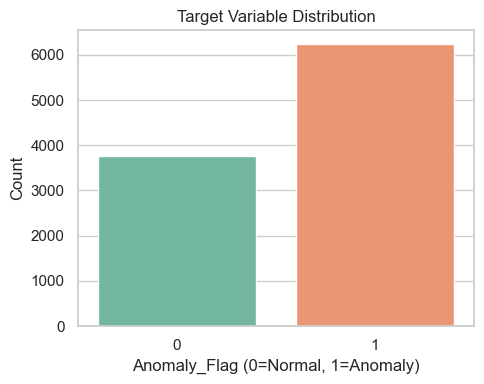

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
sns.countplot(x="Anomaly_Flag", data=df_cleaned, palette="Set2")
plt.title("Target Variable Distribution")
plt.xlabel("Anomaly_Flag (0=Normal, 1=Anomaly)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


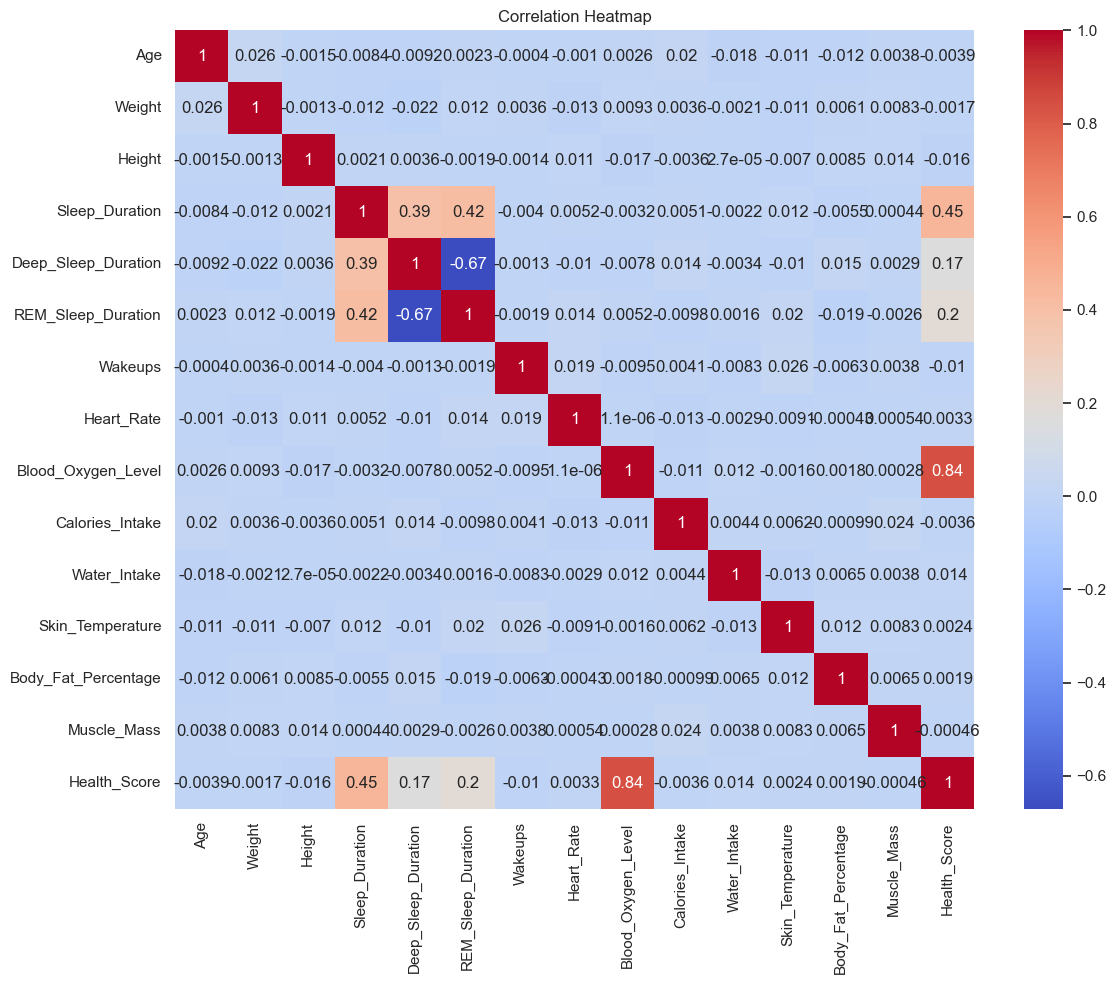

In [14]:
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Anomaly_Flag'])
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Data Preprocessing

In [16]:
df_cleaned["Heart_Rate"] = df_cleaned["Heart_Rate"].fillna(df_cleaned["Heart_Rate"].median())
df_cleaned["REM_Sleep_Duration"] = df_cleaned["REM_Sleep_Duration"].fillna(df_cleaned["REM_Sleep_Duration"].median())
df_cleaned["Mood"] = df_cleaned["Mood"].fillna(df_cleaned["Mood"].mode()[0])

In [17]:
df_cleaned["Height_m"] = df_cleaned["Height"] / 100
df_cleaned["BMI"] = df_cleaned["Weight"] / (df_cleaned["Height_m"] ** 2)
df_cleaned["Sleep_Efficiency"] = (
    df_cleaned["Deep_Sleep_Duration"] + df_cleaned["REM_Sleep_Duration"]
) / df_cleaned["Sleep_Duration"]


In [18]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_cleaned.select_dtypes(include='object').columns
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    encoders[col] = le


In [19]:
from sklearn.preprocessing import StandardScaler

features_to_scale = df_cleaned.drop(columns=["Anomaly_Flag"]).columns
scaler = StandardScaler()
df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])


In [26]:
import pickle
from sklearn.metrics import accuracy_score, f1_score

# Define dictionary to hold models and their performance
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# Train all models and evaluate
best_model_name = None
best_model = None
best_f1 = 0
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {"Accuracy": acc, "F1 Score": f1}

    # Track the best model by F1-score
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name
        best_model = model

# Display model performance
results_df = pd.DataFrame(results).T.sort_values(by="F1 Score", ascending=False)
print("Model Performance:\n", results_df)
print(f"\nBest model: {best_model_name} with F1 Score: {best_f1:.4f}")

# Save the best model
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Best model saved as 'model.pkl'")


C:\Users\malla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:10:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Performance:
                      Accuracy  F1 Score
Random Forest          1.0000  1.000000
XGBoost                0.9990  0.999197
SVM                    0.9565  0.964649
Logistic Regression    0.9385  0.950263
KNN                    0.8905  0.910576

Best model: Random Forest with F1 Score: 1.0000
Best model saved as 'model.pkl'


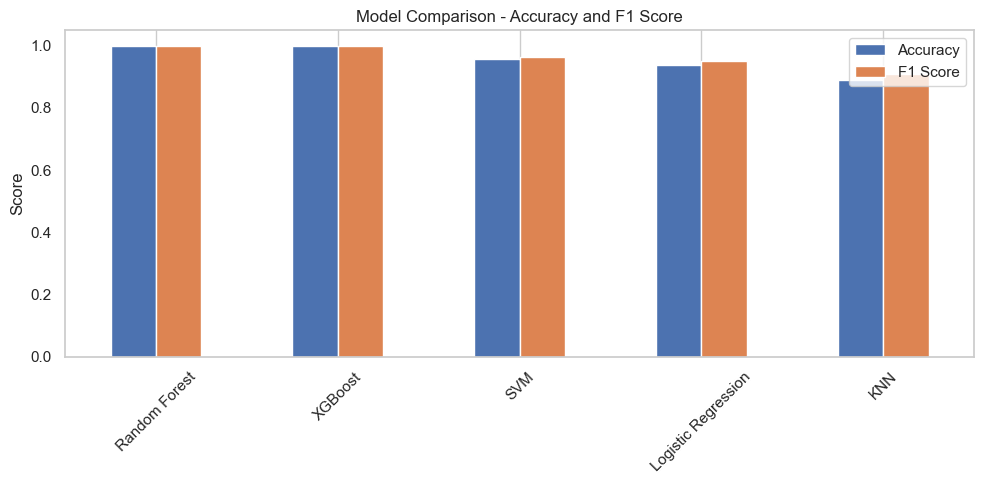

In [27]:
import matplotlib.pyplot as plt

results_df.plot(kind="bar", figsize=(10, 5))
plt.title("Model Comparison - Accuracy and F1 Score")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
